# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).
#
Atividades do CRISP-DM:
- Objetivos do negócio: note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem: o objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  #
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.
 #
Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela abaixo.



### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


| Variable Name            | Descrição                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

In [ ]:
# sexo
# posse_de_veiculo
# posse_de_imovel
# qtd_filhos
# tipo_renda
# educacao
# estado_civil
# tipo_residencia
# idade
# tempo_emprego
# possui_celular
# possui_fone_comercial
# possui_fone
# possui_email
# qt_pessoas_residencia
# mau

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [ ]:
renda = pd.read_csv('dados.csv')
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [ ]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 44.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof.to_file('/content/output/analise_renda.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




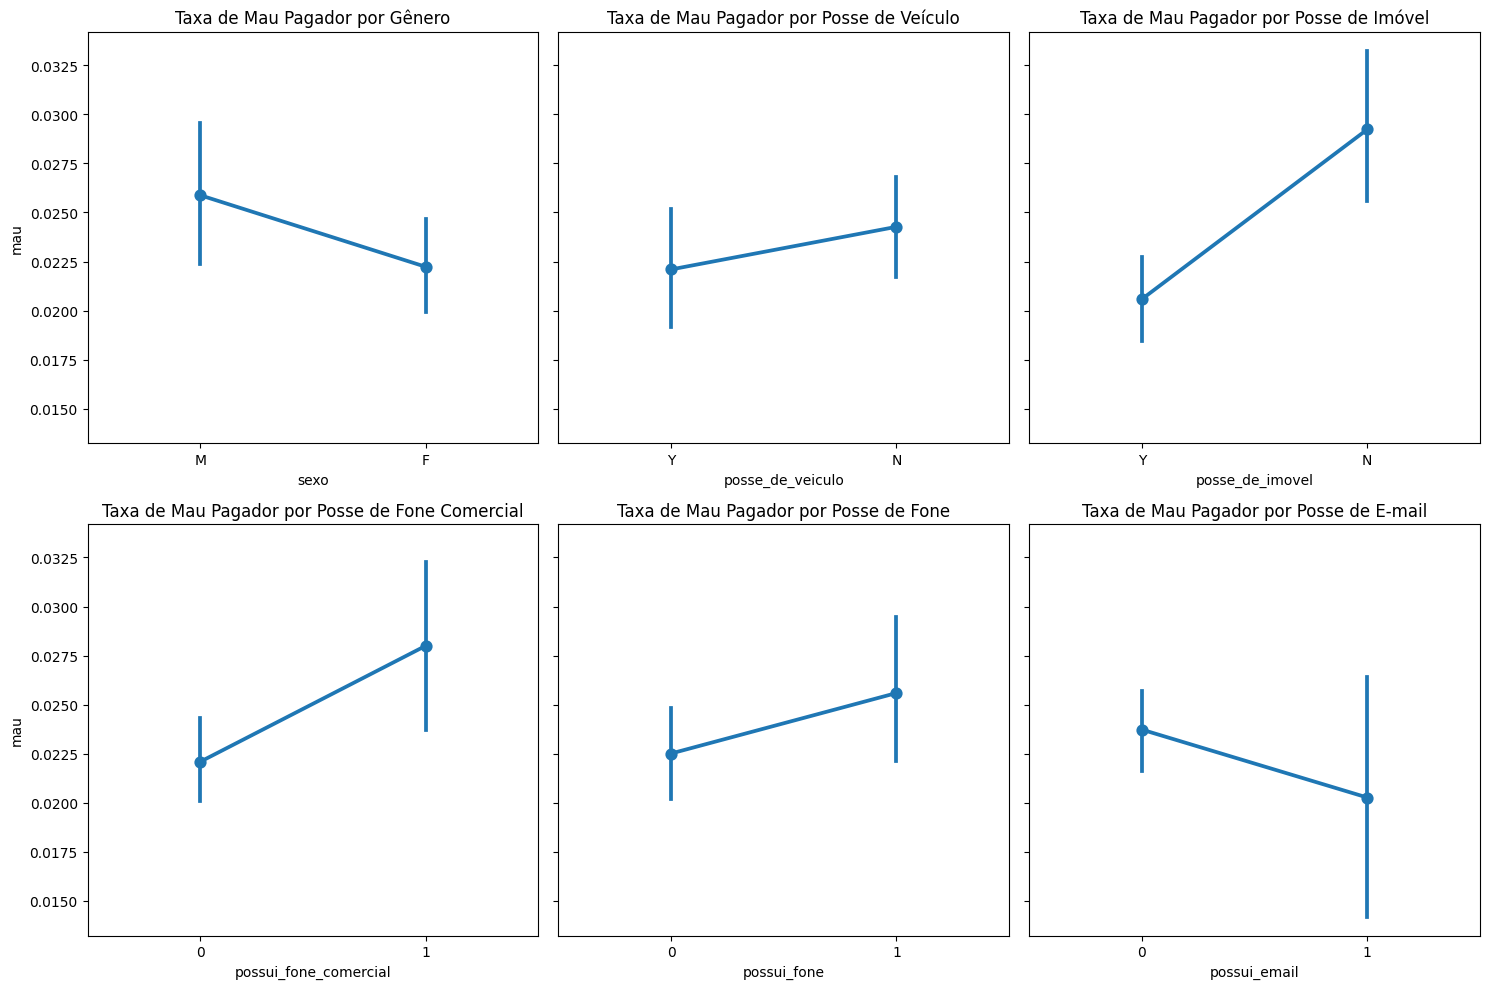

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

ax = sns.pointplot(x='sexo', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 0])
ax.set_title('Taxa de Mau Pagador por Gênero')

ax = sns.pointplot(x='posse_de_veiculo', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 1])
ax.set_title('Taxa de Mau Pagador por Posse de Veículo')

ax = sns.pointplot(x='posse_de_imovel', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 2])
ax.set_title('Taxa de Mau Pagador por Posse de Imóvel')

ax = sns.pointplot(x='possui_fone_comercial', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 0])
ax.set_title('Taxa de Mau Pagador por Posse de Fone Comercial')

ax = sns.pointplot(x='possui_fone', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 1])
ax.set_title('Taxa de Mau Pagador por Posse de Fone')

ax = sns.pointplot(x='possui_email', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 2])
ax.set_title('Taxa de Mau Pagador por Posse de E-mail')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3171535009.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)
/tmp/ipython-input-3171535009.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=90)
/tmp/ipython-input-3171535009.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)
/tmp/ipython-input-3171535009.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)


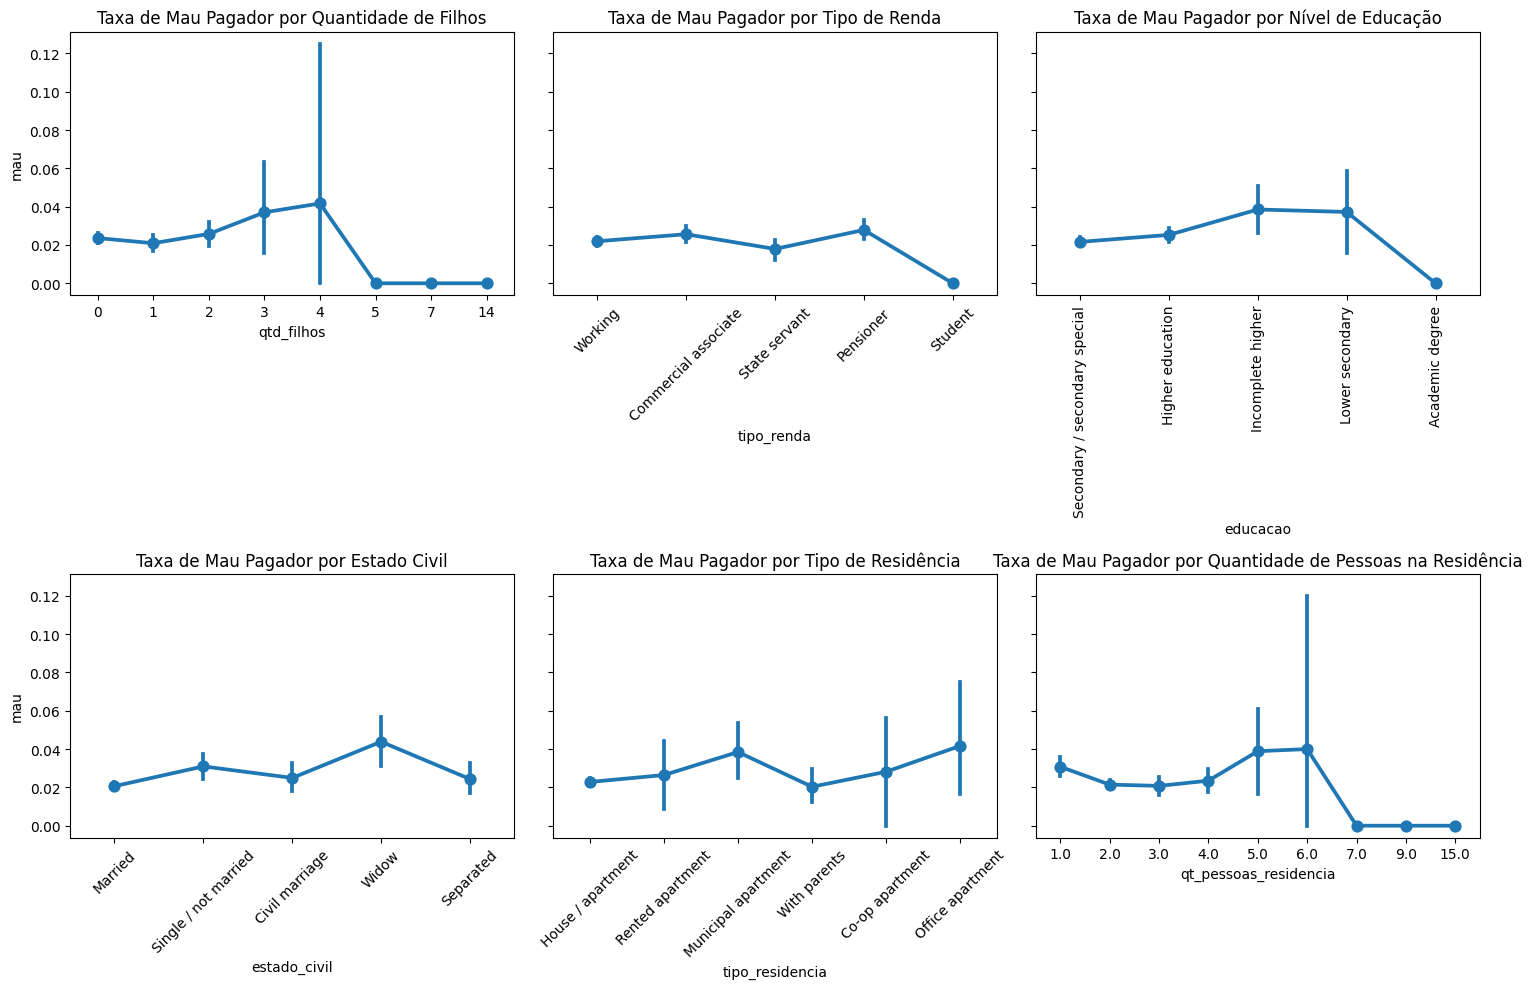

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

ax = sns.pointplot(x='qtd_filhos', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 0])
ax.set_title('Taxa de Mau Pagador por Quantidade de Filhos')

ax = sns.pointplot(x='tipo_renda', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 1])
ax.set_title('Taxa de Mau Pagador por Tipo de Renda')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)

ax = sns.pointplot(x='educacao', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[0, 2])
ax.set_title('Taxa de Mau Pagador por Nível de Educação')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=90)

ax = sns.pointplot(x='estado_civil', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 0])
ax.set_title('Taxa de Mau Pagador por Estado Civil')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)

ax = sns.pointplot(x='tipo_residencia', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 1])
ax.set_title('Taxa de Mau Pagador por Tipo de Residência')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45)

ax = sns.pointplot(x='qt_pessoas_residencia', y='mau', data=renda, dodge=True, errorbar=('ci', 90), ax=axes[1, 2])
ax.set_title('Taxa de Mau Pagador por Quantidade de Pessoas na Residência')

plt.tight_layout()
plt.show()

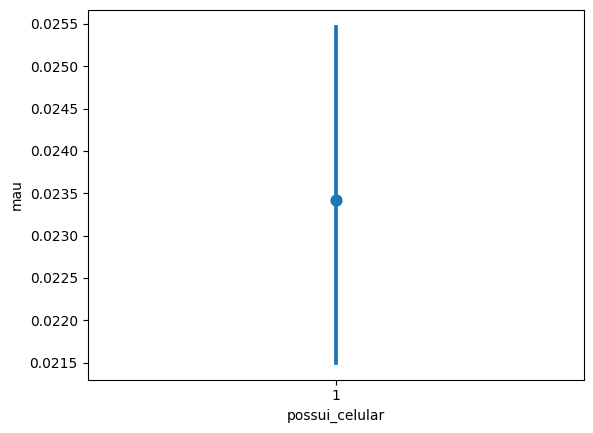

In [ ]:
# Taxa de Mau Pagador por Posse de Celular

ax = sns.pointplot(x='possui_celular', y='mau', data=renda, dodge=True, errorbar=('ci', 90))

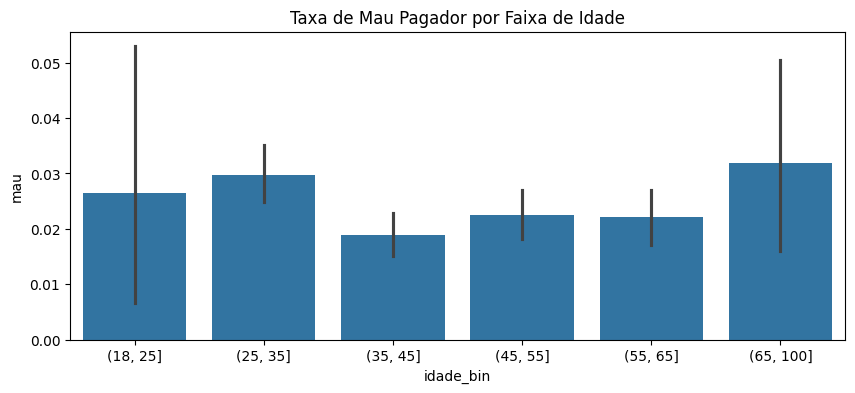

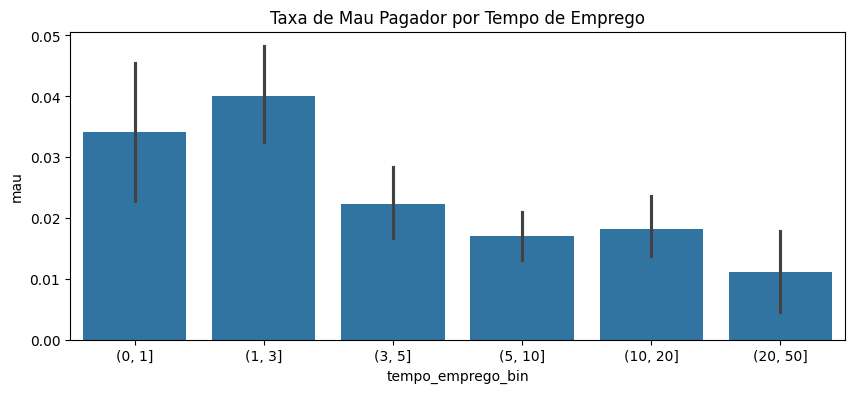

In [ ]:
# Como 'idade' e 'tempo_emprego' possuem uma variedade muito grande de possíveis
# valores, foram criados dois barplots para avaliar a relação entre essas
# variáveis e a variável 'mau'. Os valores possíveis foram separados em bins

renda['idade_bin'] = pd.cut(renda['idade'], bins=[18, 25, 35, 45, 55, 65, 100])

plt.figure(figsize=(10,4))
sns.barplot(x='idade_bin', y='mau', data=renda, errorbar=('ci', 95))
plt.title('Taxa de Mau Pagador por Faixa de Idade')
plt.show()

renda['tempo_emprego_bin'] = pd.cut(renda['tempo_emprego'], bins=[0, 1, 3, 5, 10, 20, 50])

plt.figure(figsize=(10,4))
sns.barplot(x='tempo_emprego_bin', y='mau', data=renda, errorbar=('ci', 95))
plt.title('Taxa de Mau Pagador por Tempo de Emprego')
plt.show()

In [ ]:
plt.figure(figsize=(14,10))
corr = renda.corr(numeric_only=True)

corr_mau = corr['mau'].sort_values(ascending=False)

print(corr_mau)

mau                      1.000000
possui_fone_comercial    0.016315
possui_fone              0.009299
qtd_filhos               0.003797
possui_email            -0.006512
tempo_emprego           -0.006569
qt_pessoas_residencia   -0.009068
idade                   -0.010455
possui_celular                NaN
Name: mau, dtype: float64


<Figure size 1400x1000 with 0 Axes>

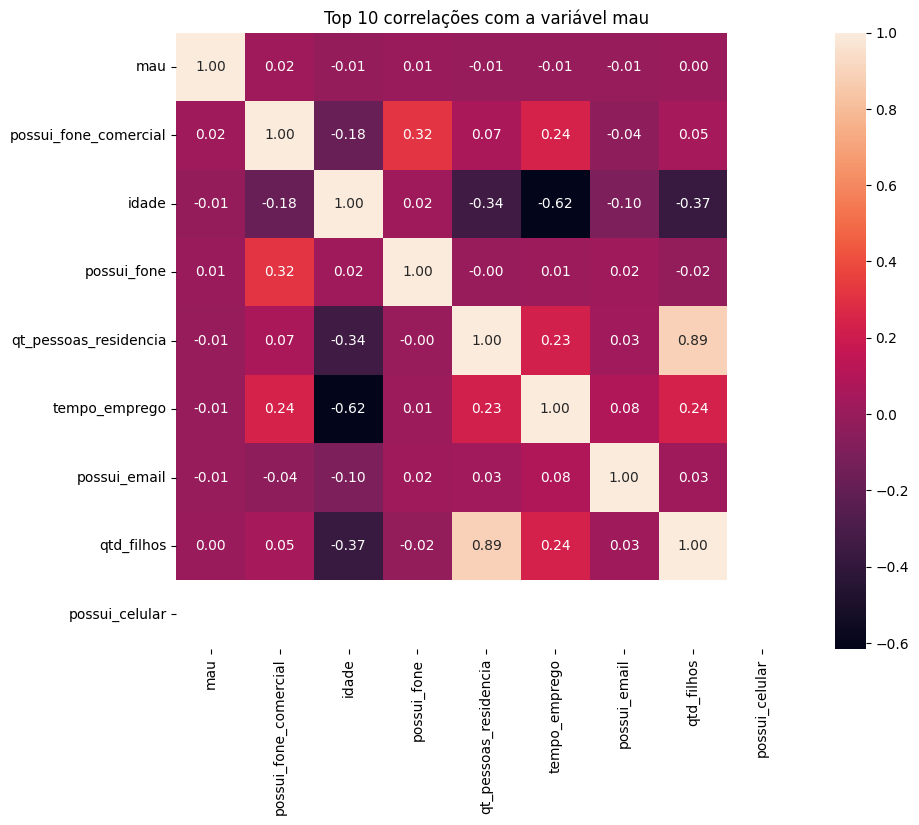

In [ ]:
top10 = corr_mau.abs().sort_values(ascending=False).head(11).index  # inclui 'mau'

plt.figure(figsize=(10, 8))
sns.heatmap(renda[top10].corr(numeric_only=True), annot=True, fmt=".2f", cmap='rocket')
plt.title('Top 10 correlações com a variável mau')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [ ]:
metadados = pd.DataFrame(renda.dtypes, columns=['tipo'])
metadados['n_categorias'] = [renda[var].nunique() for var in metadados.index]
metadados

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [ ]:
def convert_dummy(df, feature, rank=0):
    df = df.copy()  # segurança
    dummies = pd.get_dummies(df[feature], prefix=feature)

    # categoria mais frequente → será dropada (evita multicolinearidade)
    mode = df[feature].value_counts().index[rank]
    col_to_drop = f"{feature}_{mode}"

    dummies = dummies.drop(col_to_drop, axis=1)
    df = df.drop(feature, axis=1)

    return df.join(dummies)

In [ ]:
df = renda.copy()

for var in metadados[metadados['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,idade_bin,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,"(55, 65]",...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,"(45, 55]",...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,"(45, 55]",...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,"(45, 55]",...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,"(25, 35]",...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não.

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo "aprende", e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.

Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)

In [ ]:

# separando features e target
X = df.drop("mau", axis=1)
y = df["mau"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

### Rodando o modelo


A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.


In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

In [ ]:
# converter para string (se já não for)
X_train['idade_bin'] = X_train['idade_bin'].astype(str)
X_train['tempo_emprego_bin'] = X_train['tempo_emprego_bin'].astype(str)
X_test['idade_bin']  = X_test['idade_bin'].astype(str)
X_test['tempo_emprego_bin']  = X_test['tempo_emprego_bin'].astype(str)

# one-hot (drop_first opcional)
X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe  = pd.get_dummies(X_test, drop_first=True)

# alinhar colunas (técnica importante)
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

# atualizar referências
X_train = X_train_ohe
X_test  = X_test_ohe

# treinar
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9642085034830651
[[3985   90]
 [  59   29]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.98      4075
        True       0.24      0.33      0.28        88

    accuracy                           0.96      4163
   macro avg       0.61      0.65      0.63      4163
weighted avg       0.97      0.96      0.97      4163



## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.